<a href="https://colab.research.google.com/github/Nayani-j/F1--Data-Telemetry/blob/main/F1_Telemetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -U fastf1


In [8]:
import fastf1 as ff1
ff1.Cache.enable_cache('/content/cache')  # This will create a cache directory in Colab


/usr/local/lib/python3.10/dist-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
events      WARNING 	Correcting user input 'MON' to 'Italian Grand Prix'
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Qualifying [v3.4.0]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api    

Data for 2016 could not be loaded: The data you are trying to access has not been loaded yet. See `Session.load`


events      WARNING 	Correcting user input 'MON' to 'Italian Grand Prix'
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Qualifying [v3.4.0]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
DEBUG:fastf1.api:Falling back to livetiming mirror (https://livetiming-mirror.fastf1.dev)
logger      WARNING 	Failed to load session info data!
DEBUG:fastf1.fastf1.core:Traceback for failure in session info data
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastf1/logger.py", line 151, in __wrapped
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/fastf1/core.py", line 1448, in _load_session_info
    self._session_info = api.session_info(self

Data for 2017 could not be loaded: The data you are trying to access has not been loaded yet. See `Session.load`


events      WARNING 	Correcting user input 'MON' to 'Italian Grand Prix'
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Qualifying [v3.4.0]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_d

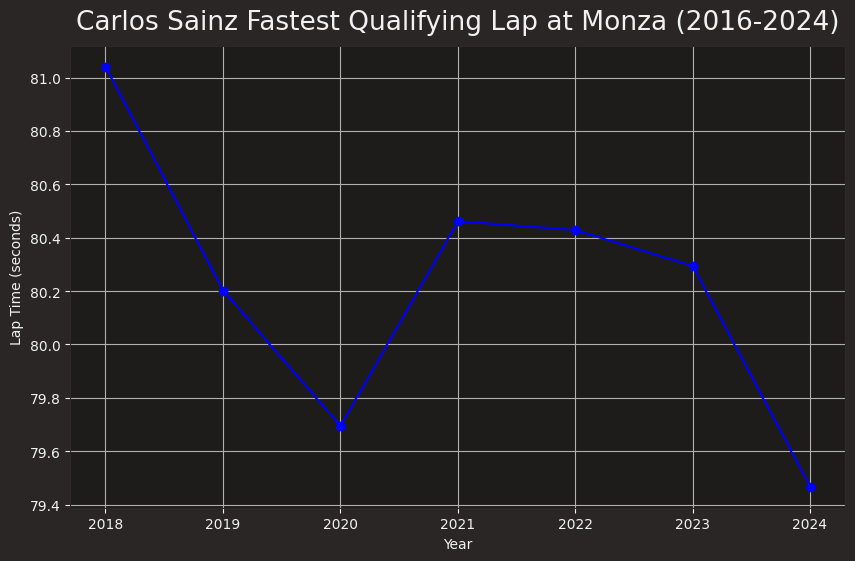

In [9]:
import fastf1 as ff1
from fastf1 import plotting
import matplotlib.pyplot as plt
import pandas as pd

# Enable matplotlib to work in Colab
plotting.setup_mpl()

driver_code = 'SAI'  # Carlos Sainz's driver code
circuit = 'MON'      # Monza circuit code

# Create a DataFrame to store the fastest lap data
laps_data = []

for year in range(2016, 2025):  # Loop from 2016 to 2024
    try:
        session = ff1.get_session(year, circuit, 'Q')  # Get qualifying session
        session.load()

        # Get Carlos Sainz's laps
        driver_laps = session.laps.pick_driver(driver_code)

        # Find the fastest lap
        fastest_lap = driver_laps.pick_fastest()

        # Append the data
        laps_data.append({
            'Year': year,
            'Lap Time (s)': fastest_lap['LapTime'].total_seconds()
        })

    except ff1.core.DataNotLoadedError as e:
        print(f"Data for {year} could not be loaded: {e}")
        continue
    except Exception as e:
        print(f"An error occurred for {year}: {e}")
        continue

# Convert to DataFrame for plotting
df = pd.DataFrame(laps_data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Lap Time (s)'], marker='o', linestyle='-', color='blue')
plt.title('Carlos Sainz Fastest Qualifying Lap at Monza (2016-2024)')
plt.xlabel('Year')
plt.ylabel('Lap Time (seconds)')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Qualifying [v3.4.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req      

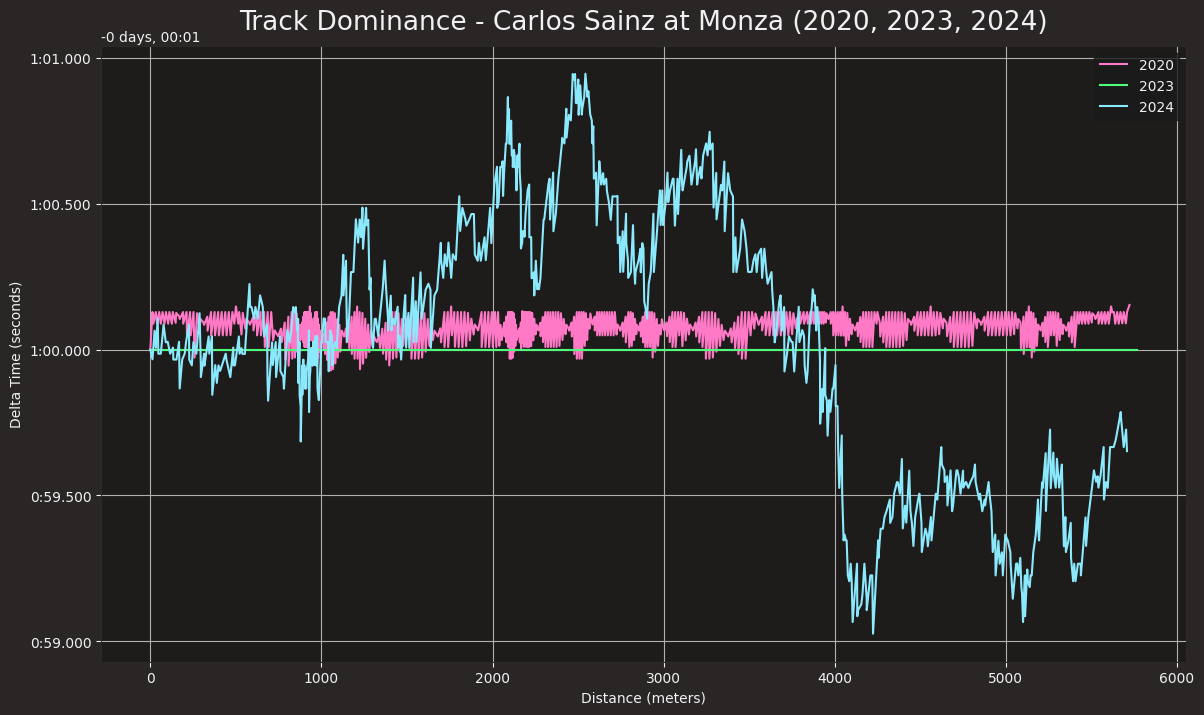

In [13]:
plotting.setup_mpl()

driver_code = 'SAI'  # Carlos Sainz's driver code
circuit = 'MON'      # Monza circuit code

# Years to compare
years = [2020, 2023, 2024]

plt.figure(figsize=(14, 8))

for year in years:
    try:
        session = ff1.get_session(year, circuit, 'Q')  # Get qualifying session
        session.load()

        # Get Carlos Sainz's fastest lap telemetry
        driver_laps = session.laps.pick_driver(driver_code)
        fastest_lap = driver_laps.pick_fastest()
        telemetry = fastest_lap.get_telemetry()

        # Get the session's overall fastest lap
        session_best_lap = session.laps.pick_fastest()
        session_best_telemetry = session_best_lap.get_telemetry()

        # Calculate time difference at each point on the track
        delta_time = telemetry['Time'] - session_best_telemetry['Time']

        # Add distance to telemetry for plotting
        telemetry = telemetry.add_distance()

        # Plot the delta time as a measure of track dominance
        plt.plot(telemetry['Distance'], delta_time, label=f'{year}')

    except ff1.core.DataNotLoadedError as e:
        print(f"Data for {year} could not be loaded: {e}")
        continue
    except Exception as e:
        print(f"An error occurred for {year}: {e}")
        continue

# Customize plot
plt.title('Track Dominance - Carlos Sainz at Monza (2020, 2023, 2024)')
plt.xlabel('Distance (meters)')
plt.ylabel('Delta Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Qualifying [v3.4.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req      

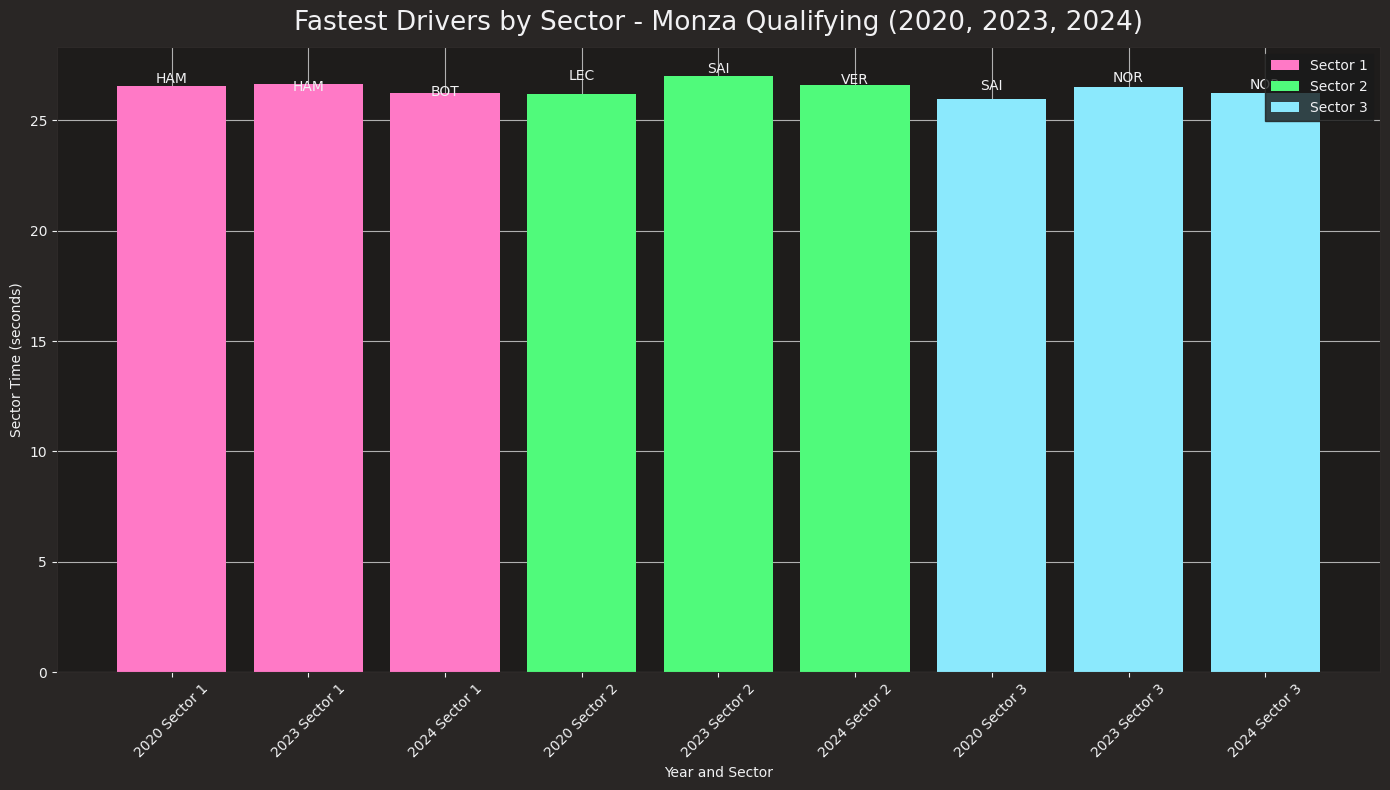

In [21]:
import fastf1 as ff1
from fastf1 import plotting
import matplotlib.pyplot as plt
import pandas as pd

# Enable plotting settings from fastf1
plotting.setup_mpl()

circuit = 'MON'      # Monza circuit code

# Years to compare
years = [2020, 2023, 2024]

# DataFrame to store sector times
sector_times = pd.DataFrame(columns=['Year', 'Sector', 'Driver', 'Sector Time'])

for year in years:
    try:
        session = ff1.get_session(year, circuit, 'Q')  # Get qualifying session
        session.load()

        # Temporary DataFrame to store sector times for the current year
        temp_df = pd.DataFrame(columns=['Year', 'Sector', 'Driver', 'Sector Time'])

        # Iterate over sectors
        for sector in [1, 2, 3]:
            # Find the fastest driver in the current sector
            fastest_lap = session.laps.sort_values(by=f'Sector{sector}Time').iloc[0]
            fastest_driver = fastest_lap['Driver']
            fastest_time = fastest_lap[f'Sector{sector}Time'].total_seconds()

            temp_df = pd.concat([temp_df, pd.DataFrame({
                'Year': [year],
                'Sector': [f'Sector {sector}'],
                'Driver': [fastest_driver],
                'Sector Time': [fastest_time]
            })], ignore_index=True)

        # Append to the main DataFrame
        sector_times = pd.concat([sector_times, temp_df], ignore_index=True)

    except ff1.core.DataNotLoadedError as e:
        print(f"Data for {year} could not be loaded: {e}")
        continue
    except Exception as e:
        print(f"An error occurred for {year}: {e}")
        continue

# Plot the results
plt.figure(figsize=(14, 8))

for sector in [1, 2, 3]:
    subset = sector_times[sector_times['Sector'] == f'Sector {sector}']
    # Concatenate year and sector as strings
    x_labels = subset['Year'].astype(str) + ' ' + subset['Sector']
    plt.bar(x_labels, subset['Sector Time'], label=f'Sector {sector}')

# Annotate with the driver names
for i, row in sector_times.iterrows():
    plt.text(i, row['Sector Time'] + 0.01, row['Driver'], ha='center', va='bottom')

# Customize plot
plt.title('Fastest Drivers by Sector - Monza Qualifying (2020, 2023, 2024)')
plt.xlabel('Year and Sector')
plt.ylabel('Sector Time (seconds)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()      # Adjust layout to make room for labels
plt.show()


In [33]:
pip install seaborn

In [34]:
import pandas as pd
import numpy as np
import random
import requests

# Don't forget to 'pip install fastf1'
import fastf1 as ff1

# Don't forget to 'pip install seaborn'
import seaborn as sns
import matplotlib.pyplot as plt